# matchms tutorial
## part II - compute spectra similarities using Spec2Vec
The first part of the notebook is identical to part I (same data, same processing).

### Requirements
For this notebook to work, both `matchms` and `Spec2Vec` need to be installed.
This can be done by running:

```
conda create --name spec2vec python=3.8
conda activate spec2vec
conda install --channel nlesc --channel bioconda --channel conda-forge spec2vec
```

## Import data
- matchms has several importing options, e.g.: `load_from_json`, `load_from_mzml`, `load_from_mzxml` etc. Here we are going to use `load_from_mgf`
- Import spectrum from mgf file downloaded from GNPS 

In [1]:
import os
import numpy as np
from matchms.importing import load_from_mgf

path_data = os.path.join(os.path.dirname(os.getcwd()), "..", "Data", "MIADB") #"..." enter your pathname to the downloaded file
file_mgf = os.path.join(path_data, "MIADB_subset_review.mgf")
spectrums = list(load_from_mgf(file_mgf))

In [2]:
print(f"{len(spectrums)} spectrums found and imported")

23 spectrums found and imported


## Inspect spectra
- Inspect the metadata: inchikey, inchi, smiles
- Inspect the number of peaks per spectrum

In [3]:
inchikeys = [s.get("inchikey") for s in spectrums]
found_inchikeys = np.sum([1 for x in inchikeys if x is not None])
print(f"Found {int(found_inchikeys)} inchikeys in metadata")

Found 0 inchikeys in metadata


In [4]:
inchi = [s.get("inchi") for s in spectrums]
inchi[:10]

['InChI=1S/C20H22N2O2/c1-3-11-10-22-16-9-14-12-6-4-5-7-15(12)21-19(14)17(22)8-13(11)18(16)20(23)24-2/h3-7,13,16-18,21H,8-10H2,1-2H3/b11-3-/t13-,16-,17-,18-/m0/s1',
 'InChI=1S/C20H22N2O3/c1-3-11-10-22(24)16-9-14-12-6-4-5-7-15(12)21-19(14)17(22)8-13(11)18(16)20(23)25-2/h3-7,13,16-18,21H,8-10H2,1-2H3/b11-3-/t13-,16-,17-,18-,22-/m0/s1',
 'InChI=1S/C21H24N2O3/c1-3-12-10-23-17-9-15(12)21(11-24,20(25)26-2)18(23)8-14-13-6-4-5-7-16(13)22-19(14)17/h3-7,15,17-18,22,24H,8-11H2,1-2H3/b12-3-/t15-,17-,18-,21?/m0/s1',
 'InChI=1S/C22H26N2O3/c1-4-13-11-24-18-10-16(13)22(12-25,21(26)27-3)19(24)9-15-14-7-5-6-8-17(14)23(2)20(15)18/h4-8,16,18-19,25H,9-12H2,1-3H3/b13-4-/t16-,18?,19-,22?/m0/s1',
 'InChI=1S/C22H26N2O3/c1-4-14-12-24-10-9-16-15-7-5-6-8-19(15)23-21(16)20(24)11-17(14)18(13-26-2)22(25)27-3/h4-8,13-14,17,20,23H,1,9-12H2,2-3H3/b18-13+/t14-,17-,20-/m0/s1',
 'InChI=1S/C22H28N2O3/c1-4-14-12-24-10-9-16-15-7-5-6-8-19(15)23-21(16)20(24)11-17(14)18(13-26-2)22(25)27-3/h5-8,13-14,17,20,23H,4,9-12H2,1-3H3/b18-

In [5]:
smiles = [s.get("smiles") for s in spectrums]
smiles[:10]

['C/C=C1CN([C@@]([H])(CC2=C3NC4=CC=CC=C24)[C@H]5C(OC)=O)[C@@]3([H])C[C@@]/15[H]',
 'C/C=C(C1)\\[C@@H]2C[C@@]([N@@+]1([O-])[C@H]([C@H]2C(OC)=O)C3)([H])C4=C3C5=CC=CC=C5N4',
 'C/C=C(C1)\\[C@@H]2C[C@@](N1[C@H](C2(CO)C(OC)=O)C3)([H])C4=C3C5=CC=CC=C5N4',
 'C/C=C(C1)\\[C@@H]2CC(N1[C@H](C2(C(OC)=O)CO)C3)C4=C3C5=C(N4C)C=CC=C5',
 '[H][C@](N1CC2)(C[C@@](/C(C(OC)=O)=C\\OC)([H])[C@@H](C=C)C1)C3=C2C4=CC=CC=C4N3',
 '[H][C@](N1CC2)(C[C@@](/C(C(OC)=O)=C\\OC)([H])[C@H](CC)C1)C3=C2C4=CC=CC=C4N3',
 '[H][C@@](N1CC2)(C[C@@]([C@@H](C(OC)=O)[C@@H](O)CC3)([H])[C@]3([H])C1)C4=C2C5=C(N4)C=CC=C5',
 '[H][C@](N1CC2)(C[C@H](CCO)[C@H](CC)C1)C3=C2C4=CC=CC=C4N3',
 'O=C(OC)C1=CO[C@@H](C)[C@@](C2)([H])[C@]1([H])C[C@](N2CC3)([H])C4=C3C5=C(N4)C=CC=C5',
 'C=C[C@@H](CO)[C@](CC1)([H])C[C@@](N1CC2)([H])C3=C2C4=C(N3)C=CC=C4']

In [6]:
from matchms.filtering import default_filters
from matchms.filtering import repair_inchi_inchikey_smiles
from matchms.filtering import derive_inchikey_from_inchi
from matchms.filtering import derive_smiles_from_inchi
from matchms.filtering import derive_inchi_from_smiles
from matchms.filtering import harmonize_undefined_inchi
from matchms.filtering import harmonize_undefined_inchikey
from matchms.filtering import harmonize_undefined_smiles
from matchms.filtering import add_precursor_mz

def metadata_processing(spectrum):
    spectrum = default_filters(spectrum)
    spectrum = repair_inchi_inchikey_smiles(spectrum)
    spectrum = derive_inchi_from_smiles(spectrum)
    spectrum = derive_smiles_from_inchi(spectrum)
    spectrum = derive_inchikey_from_inchi(spectrum)
    spectrum = harmonize_undefined_smiles(spectrum)
    spectrum = harmonize_undefined_inchi(spectrum)
    spectrum = harmonize_undefined_inchikey(spectrum)
    spectrum = add_precursor_mz(spectrum)
    return spectrum

In [7]:
spectrums = [metadata_processing(s) for s in spectrums]

Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to metadata.
Removed adduct M+H from compound name.
Added adduct [M+H]+ to me

In [8]:
inchikeys = [s.get("inchikey") for s in spectrums]
inchikeys[:10]

['KLYKGWYHZKEJOS-OIXVIMQBSA-N',
 'QYONROBEKPAESK-YBTNASEBSA-N',
 'DGQWMSVZRIPJMR-YBTNASEBSA-N',
 'DBCVUIBEXPYXAJ-SDVLLTEKSA-N',
 'BQGJXFQCMYJENQ-GIVPXCGWSA-N',
 'QMPMOSMXZGIBBR-DXBSEXLMSA-N',
 'AJUAZNUVBAVUAY-INLXSERXSA-N',
 'NFUNVPXUVUEVKF-CSUVEVHTSA-N',
 'QODPASWLKWJHBB-PTORSQSXSA-N',
 'RYJBYRAOLAWKPE-BWFDLDMASA-N']

Text(0, 0.5, 'Number of spectra')

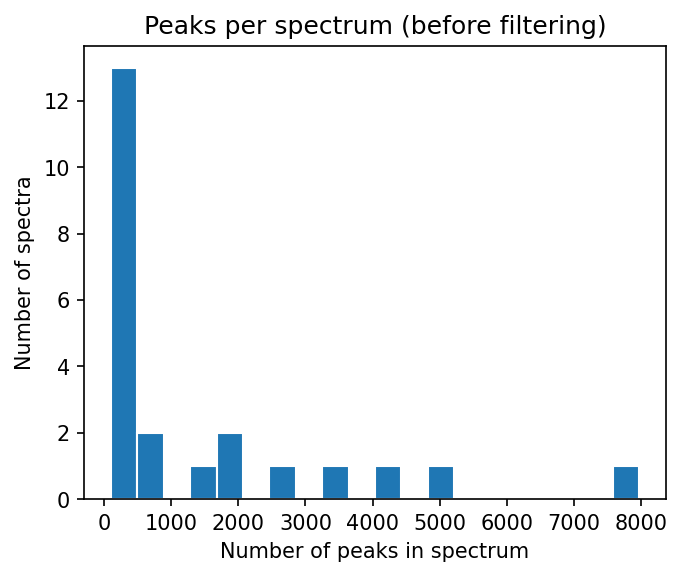

In [8]:
numbers_of_peaks = [len(s.peaks.mz) for s in spectrums]

from matplotlib import pyplot as plt
plt.figure(figsize=(5,4), dpi=150)
plt.hist(numbers_of_peaks, 20, edgecolor="white")
plt.title("Peaks per spectrum (before filtering)")
plt.xlabel("Number of peaks in spectrum")
plt.ylabel("Number of spectra")
#plt.savefig("hist01.png")

## Processing pipeline

In [9]:
from matchms.filtering import normalize_intensities
from matchms.filtering import select_by_intensity, select_by_mz
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import require_minimum_number_of_peaks
from matchms.filtering import add_losses

def peak_processing(spectrum):
    spectrum = normalize_intensities(spectrum)
    spectrum = select_by_intensity(spectrum, intensity_from=0.001)
    spectrum = select_by_mz(spectrum, mz_from=10, mz_to=1000)
    spectrum = reduce_to_number_of_peaks(spectrum, n_max=1000)
    spectrum = add_losses(spectrum, loss_mz_from=5.0, loss_mz_to=1000.0)
    return spectrum

In [10]:
spectrums = [peak_processing(s) for s in spectrums]

Text(0, 0.5, 'Number of spectra')

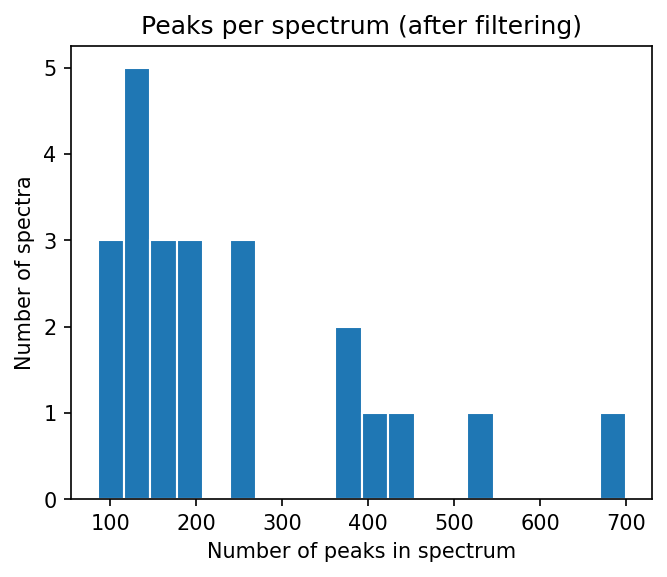

In [11]:
numbers_of_peaks = [len(s.peaks.mz) for s in spectrums]

from matplotlib import pyplot as plt
plt.figure(figsize=(5,4), dpi=150)
plt.hist(numbers_of_peaks, 20, edgecolor="white")
plt.title("Peaks per spectrum (after filtering)")
plt.xlabel("Number of peaks in spectrum")
plt.ylabel("Number of spectra")
#plt.savefig("hist02.png")

In [12]:
for spec in spectrums:
    spec_id = spec.get("spectrumid")
    if spec_id and spec_id.startswith("CCM"):
        print(spec_id)
    elif "spectrum id" in spec.metadata:
        new_spec_id = spec.get("spectrum id")
        spec.set("spectrumid", new_spec_id)
        print(f"Replaced spectrumid of {spec_id} with {new_spec_id}")
    else:
        print(f"missing id {spec_id}")
        

CCMSLIB00004680027
CCMSLIB00005436291
CCMSLIB00004679939
CCMSLIB00004680082
CCMSLIB00004679966
CCMSLIB00004679964
CCMSLIB00004680042
CCMSLIB00004679965
CCMSLIB00004679940
CCMSLIB00004679947
CCMSLIB00004679963
CCMSLIB00004680046
CCMSLIB00004680087
CCMSLIB00004679968
CCMSLIB00004679967
CCMSLIB00004679943
CCMSLIB00004679955
CCMSLIB00004680044
CCMSLIB00004679981
CCMSLIB00004680067
CCMSLIB00005463665
CCMSLIB00005463663
CCMSLIB00005463664


---

## 2. Load a pretrained Spec2Vec model
For many use-cases we would not advice to retrain a new model from scratch. Instead a more general model that has been trained on a large MS/MS dataset can simply be loaded and used to calculate similarities, even for spectra which were not part of the initial model training.

Here we used a newly trained model....

Let's now load this model:

In [13]:
import gensim

path_model = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA\\Data\\trained_models" #"..."
filename_model = "ALL_GNPS_positive_210305_Spec2Vec_stricter_losses10_1000_iter_20.model" #"spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model"
filename = os.path.join(path_model, filename_model)

model = gensim.models.Word2Vec.load(filename)

It is very important to make sure that the "documents" are created the same way as for the model training. This mostly comes down here to the number of decimals which needs to be the same here than for the pretrained model. To inspect the words the model has learned, we can look at `model.wv.vocab` which is the "vocabulary" the model has learned.

In [14]:
list(model.wv.vocab.keys())[0]

'peak@289.29'

This means the model will expect words with 2 decimals!

## Compute similarities

In [15]:
from matchms import calculate_scores
from spec2vec import Spec2Vec

spec2vec_similarity = Spec2Vec(model=model, intensity_weighting_power=0.5,
                               allowed_missing_percentage=50.0, progress_bar=True)

scores = calculate_scores(spectrums, spectrums, spec2vec_similarity, is_symmetric=True)

Calculating vectors of reference spectrums: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 136.79it/s]


In [16]:
scores.scores.shape

(23, 23)

## Visualize the results --> 23 spectra can even be plotted as array

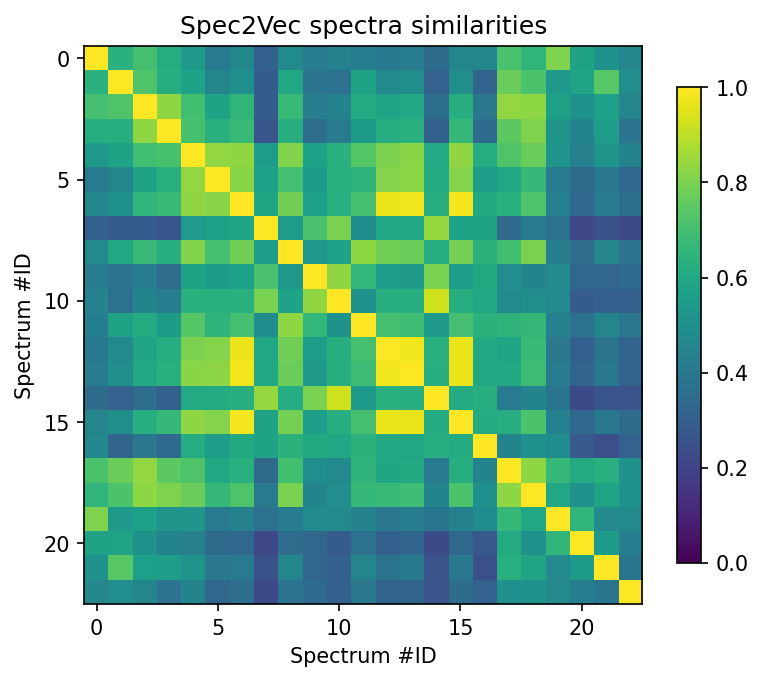

In [17]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(scores.scores, cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Spec2Vec spectra similarities")
plt.xlabel("Spectrum #ID")
plt.ylabel("Spectrum #ID")
plt.clim(0, 1)  # Spec2Vec scores can be between -1 and 1
#plt.savefig("spec2vec_scores.png")

## Get highest scoring results for a spectrum of interest

In [18]:
best_matches = scores.scores_by_query(spectrums[11], sort=True)[:10]
[x[1] for x in best_matches]

[0.9999999999999993,
 0.8306518830320131,
 0.7344045794705978,
 0.7065700104540833,
 0.7061978255514414,
 0.7054109875443126,
 0.6901719884792371,
 0.6667372580889305,
 0.6620728814342351,
 0.6497337725930585]

In [19]:
[x[0].get("smiles") for x in best_matches]

['O=C(OC)C1=CO[C@@H](C)[C@](C2)([H])[C@]1([H])C[C@@](N2CC3)([H])C4=C3C5=C(N4)C=CC=C5',
 'O=C(OC)C1=CO[C@@H](C)[C@@](C2)([H])[C@]1([H])C[C@](N2CC3)([H])C4=C3C5=C(N4)C=CC=C5',
 '[H][C@](N1CC2)(C[C@@](/C(C(OC)=O)=C\\OC)([H])[C@@H](C=C)C1)C3=C2C4=CC=CC=C4N3',
 '[H][C@](N1CC2)(C[C@@]([C@@H](C(OC)=O)[C@@H](O)CC3)([H])[C@@]3([H])C1)C4=C2C5=C(N4)C=CC=C5',
 '[H][C@@](N1CC2)(C[C@@]([C@@H](C(OC)=O)[C@@H](O)CC3)([H])[C@]3([H])C1)C4=C2C5=C(N4)C=CC=C5',
 '[H][C@](N1CC2)(C[C@@]([C@@H](C(OC)=O)[C@@H](O)CC3)([H])[C@]3([H])C1)C4=C2C5=C(N4)C=CC=C5',
 '[H][C@](N1CC2)(C[C@@]([C@H](C(OC)=O)[C@@H](O)CC3)([H])[C@]3([H])C1)C4=C2C5=C(N4)C=CC=C5',
 'C/C=C(C1)\\C(/C(C(OC)=O)=C/O)C[C@@](N1CC2)([H])C3=C2C4=CC=CC=C4N3',
 'C=C[C@@H](CO)[C@](CC1)([H])C[C@@](N1CC2)([H])C3=C2C4=C(N3)C=CC=C4',
 '[H][C@](N1CC2)(C[C@@](/C(C(OC)=O)=C\\OC)([H])[C@H](CC)C1)C3=C2C4=CC=CC=C4N3']

Those smiles can be beter inspected by plotting the corresponding chemical structures, e.g. using rdkit:

In [22]:
from rdkit import Chem
from rdkit.Chem import Draw

for i, smiles in enumerate([x[0].get("smiles") for x in best_matches]):
    m = Chem.MolFromSmiles(smiles)
    Draw.MolToFile(m, f"compound_{i}.png")

## Network analysis

Using `matchmsextras` functions here.
Simply install by:

```
pip install matchmsextras>=0.2.1
```


In [20]:
import networkx as nx
from matchmsextras.networking import create_network, plot_cluster

In [21]:
msnet = create_network(scores,
                       cutoff=0.7,
                       max_links=10)

## Export network to graphml

In [22]:
nx.write_graphml(msnet, "network_MIADBsubset_spec2vec_newModel_cutoff_07.graphml")

## Collect metadata and export as csv

In [23]:
# add parent mass estimates

from matchms.filtering import add_parent_mass
spectrums = [add_parent_mass(s) for s in spectrums]

In [24]:
from matchmsextras.networking import extract_networking_metadata

metadata = extract_networking_metadata(spectrums)
metadata.head()

,smiles,compound_name,parent_mass
CCMSLIB00004680027,C/C=C1CN([C@@]([H])(CC2=C3NC4=CC=CC=C24)[C@H]5...,Pericyclivine,322.168724
CCMSLIB00005436291,C/C=C(C1)\[C@@H]2C[C@@]([N@@+]1([O-])[C@H]([C@...,pericyclivine-N-oxide,338.161724
CCMSLIB00004679939,C/C=C(C1)\[C@@H]2C[C@@](N1[C@H](C2(CO)C(OC)=O)...,Akuammidine,352.178724
CCMSLIB00004680082,C/C=C(C1)\[C@@H]2CC(N1[C@H](C2(C(OC)=O)CO)C3)C...,Voachalotine,366.194724
CCMSLIB00004679966,[H][C@](N1CC2)(C[C@@](/C(C(OC)=O)=C\OC)([H])[C...,Corynantheine,366.194724


In [25]:
metadata.to_csv("MIADBsubset_metadata.csv")

Largest cluster contains 16 spectra.


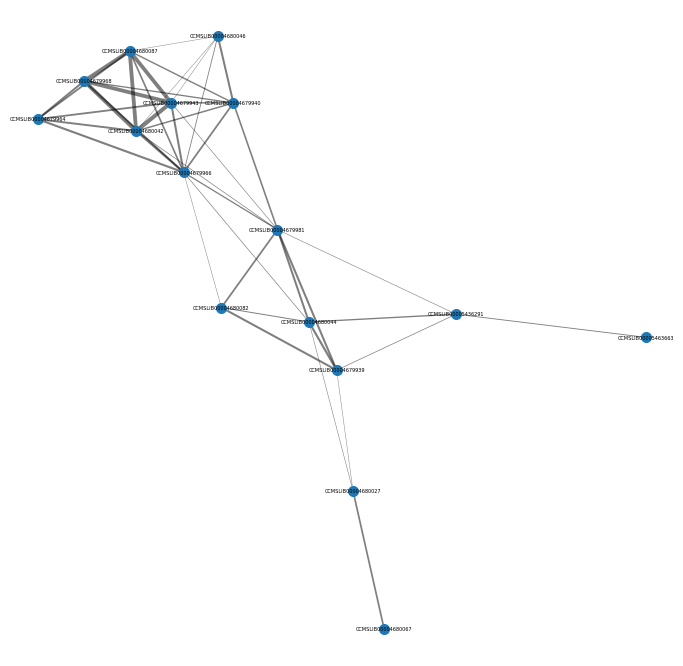

In [26]:
# Split into subclusters
largest_cc = max(nx.connected_components(msnet), key=len)
print(f"Largest cluster contains {len(largest_cc)} spectra.")
S = [msnet.subgraph(c).copy() for c in nx.connected_components(msnet)]

# Sort clusters by size
cluster_sizes = np.array([len(x.nodes()) for x in S])
S_sorted = [S[i] for i in cluster_sizes.argsort()[::-1]]
plot_cluster(S_sorted[0])

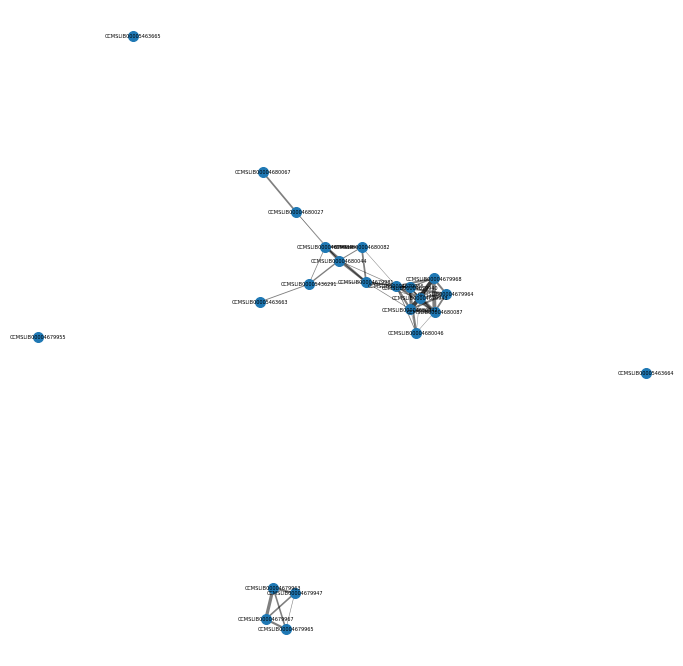

In [27]:
plot_cluster(msnet)

## Cutoff = 0.75

Largest cluster contains 13 spectra.


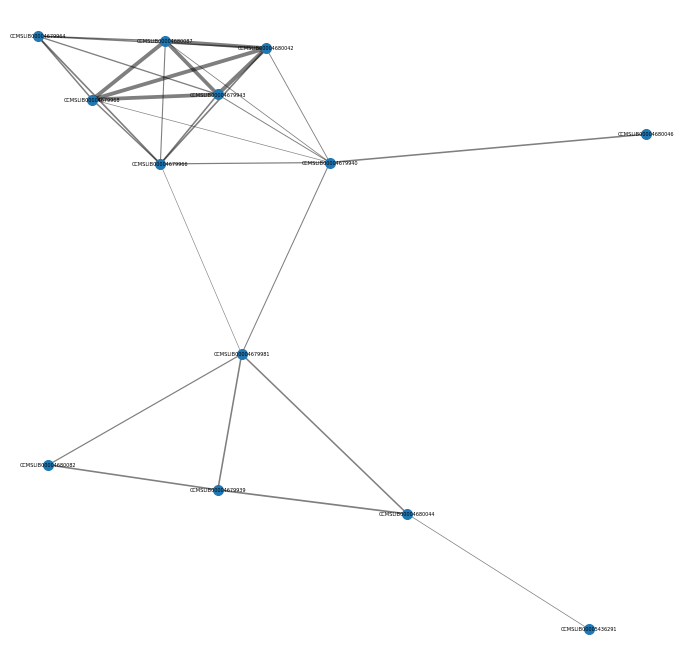

In [28]:
msnet = create_network(scores,
                       cutoff=0.75,
                       max_links=10)

nx.write_graphml(msnet, "network_MIADBsubset_spec2vec_newModel_cutoff_075.graphml")

# Split into subclusters
largest_cc = max(nx.connected_components(msnet), key=len)
print(f"Largest cluster contains {len(largest_cc)} spectra.")
S = [msnet.subgraph(c).copy() for c in nx.connected_components(msnet)]

# Sort clusters by size
cluster_sizes = np.array([len(x.nodes()) for x in S])
S_sorted = [S[i] for i in cluster_sizes.argsort()[::-1]]
plot_cluster(S_sorted[0])

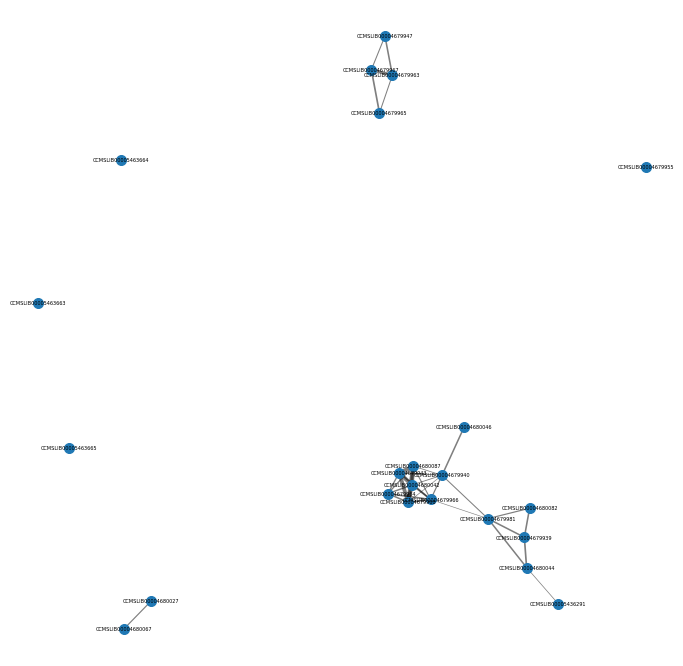

In [29]:
plot_cluster(msnet)

## Cutoff = 0.8

Largest cluster contains 8 spectra.


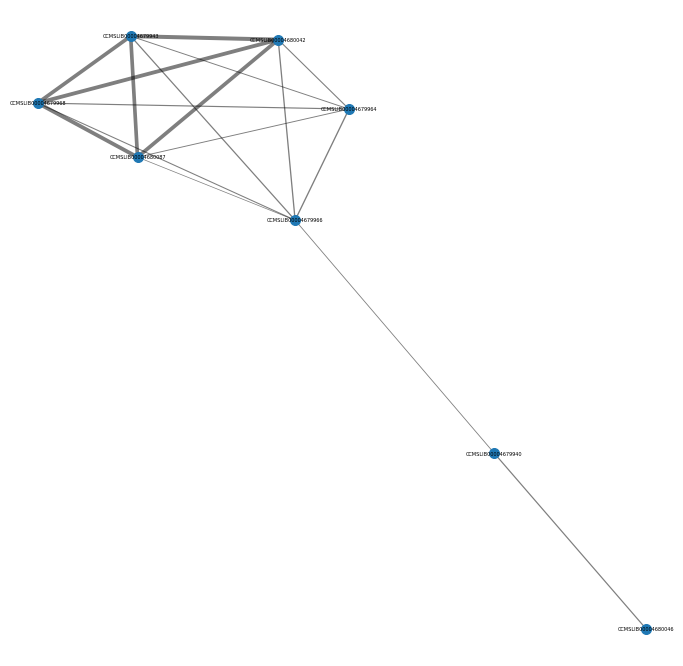

In [30]:
msnet = create_network(scores,
                       cutoff=0.8,
                       max_links=10)

nx.write_graphml(msnet, "network_MIADBsubset_spec2vec_newModel_cutoff_08.graphml")

# Split into subclusters
largest_cc = max(nx.connected_components(msnet), key=len)
print(f"Largest cluster contains {len(largest_cc)} spectra.")
S = [msnet.subgraph(c).copy() for c in nx.connected_components(msnet)]

# Sort clusters by size
cluster_sizes = np.array([len(x.nodes()) for x in S])
S_sorted = [S[i] for i in cluster_sizes.argsort()[::-1]]
plot_cluster(S_sorted[0])

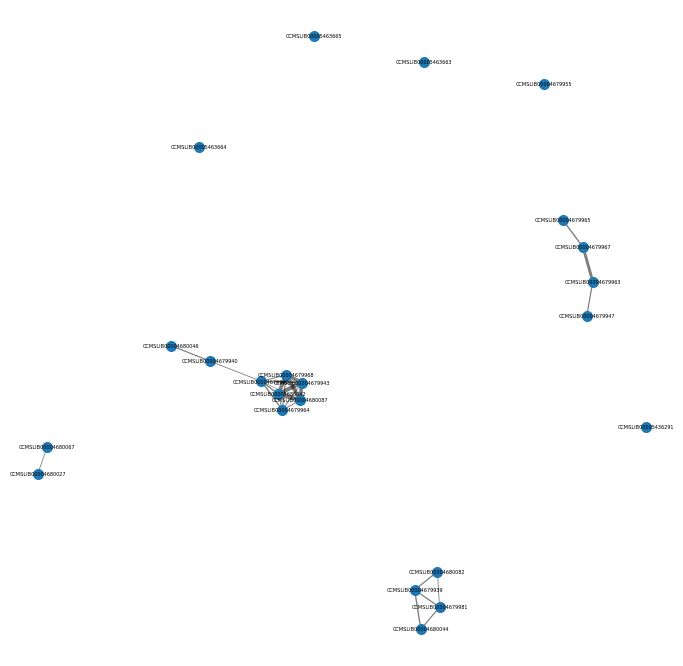

In [31]:
plot_cluster(msnet)

## Cutoff = 0.85

Largest cluster contains 4 spectra.


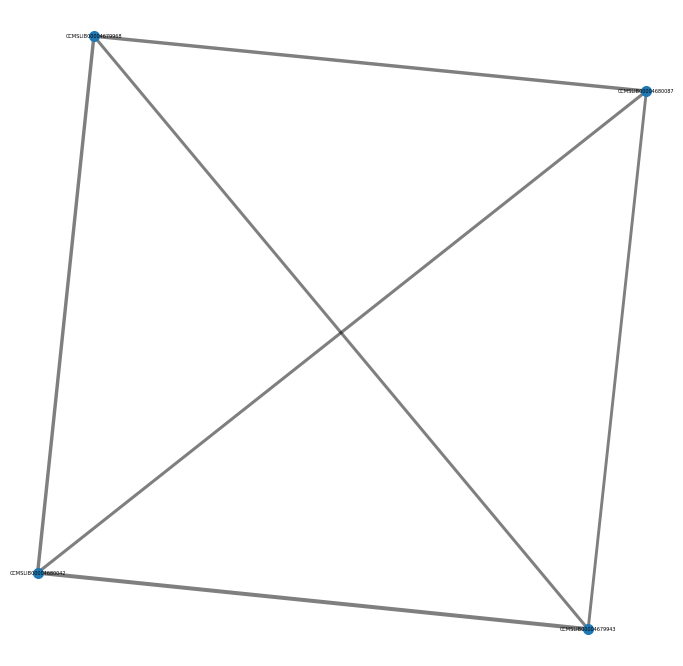

In [32]:
msnet = create_network(scores,
                       cutoff=0.85,
                       max_links=10)

nx.write_graphml(msnet, "network_MIADBsubset_spec2vec_newModel_cutoff_085.graphml")

# Split into subclusters
largest_cc = max(nx.connected_components(msnet), key=len)
print(f"Largest cluster contains {len(largest_cc)} spectra.")
S = [msnet.subgraph(c).copy() for c in nx.connected_components(msnet)]

# Sort clusters by size
cluster_sizes = np.array([len(x.nodes()) for x in S])
S_sorted = [S[i] for i in cluster_sizes.argsort()[::-1]]
plot_cluster(S_sorted[0])

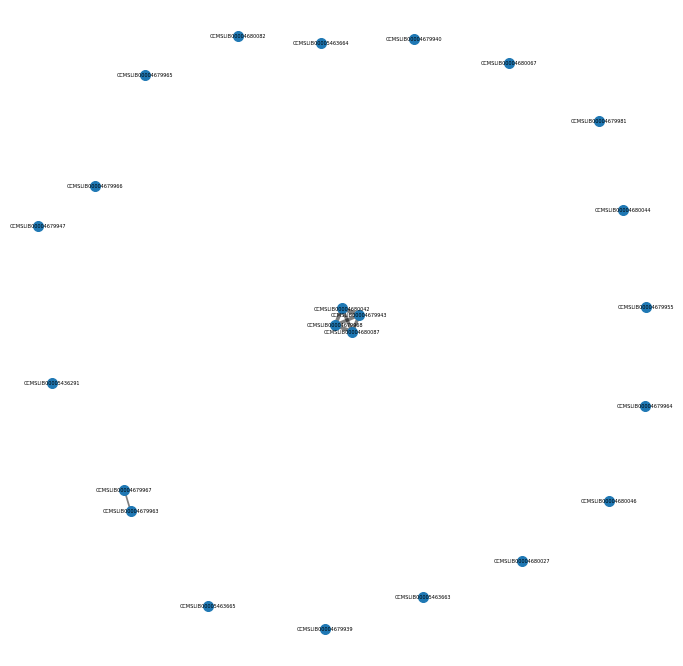

In [33]:
plot_cluster(msnet)

## Cutoff = 0.6

Largest cluster contains 21 spectra.


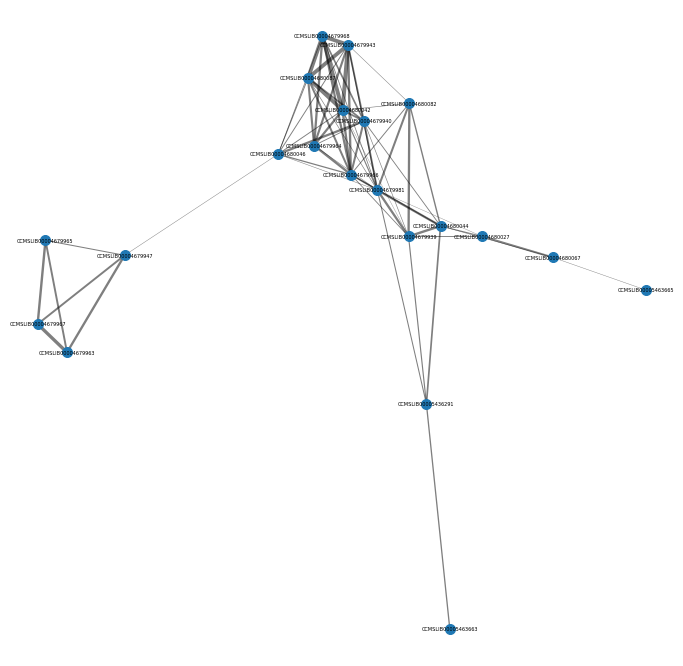

In [41]:
msnet = create_network(scores,
                       cutoff=0.65,
                       max_links=10)

nx.write_graphml(msnet, "network_MIADBsubset_spec2vec_newModel_cutoff_060.graphml")

# Split into subclusters
largest_cc = max(nx.connected_components(msnet), key=len)
print(f"Largest cluster contains {len(largest_cc)} spectra.")
S = [msnet.subgraph(c).copy() for c in nx.connected_components(msnet)]

# Sort clusters by size
cluster_sizes = np.array([len(x.nodes()) for x in S])
S_sorted = [S[i] for i in cluster_sizes.argsort()[::-1]]
plot_cluster(S_sorted[0])

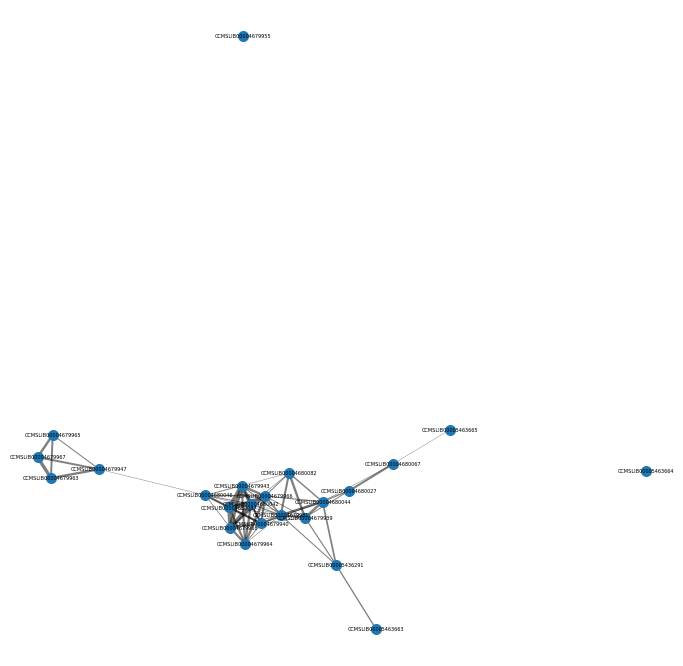

In [42]:
plot_cluster(msnet)

## Use cluster dilation step

- loop through all nodes:
- IF node part of cluster < min_cluster_size: add link based on next highest Spec2Vec score  
(IF score>min_weight and IF new link does not create a cluster > max_cluster_size)

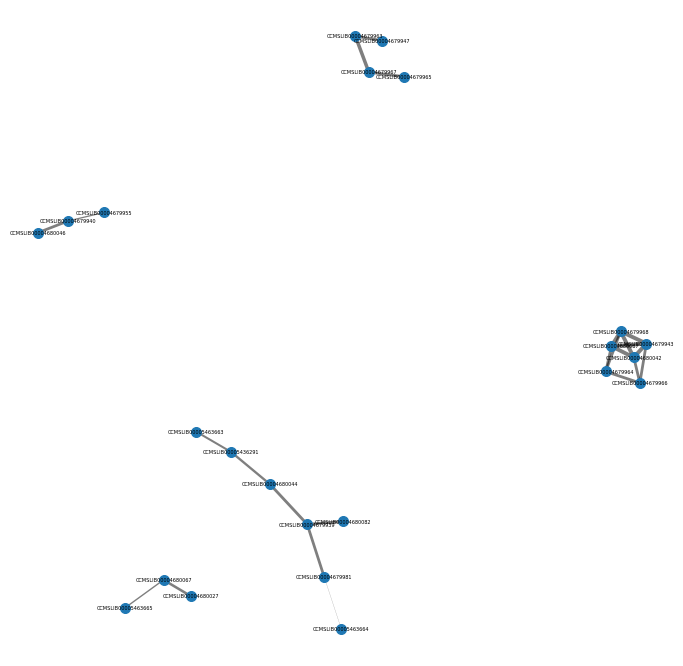

In [36]:
from matchmsextras.networking import dilate_cluster

msnet = create_network(scores,
                       cutoff=0.85,
                       max_links=10)

msnet_dilated, links_added = dilate_cluster(msnet,
                                            scores,
                                            identifier="spectrumid",
                                            min_weight=0.5,
                                            max_cluster_size=100,
                                            min_cluster_size=10)

plot_cluster(msnet_dilated)

In [37]:
nx.write_graphml(msnet_dilated, "network_MIADBsubset_085_dilated_experiment.graphml")